In [20]:
pip install ucimlrepo


Note: you may need to restart the kernel to use updated packages.


In [21]:

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
raisin = fetch_ucirepo(id=850) 
  
# data (as pandas dataframes) 
X = raisin.data.features 
y = raisin.data.targets 
  
# metadata 
print(raisin.metadata) 
  
# variable information 
print(raisin.variables) 

{'uci_id': 850, 'name': 'Raisin', 'repository_url': 'https://archive.ics.uci.edu/dataset/850/raisin', 'data_url': 'https://archive.ics.uci.edu/static/public/850/data.csv', 'abstract': 'Images of the Kecimen and Besni raisin varieties were obtained with CVS. A total of 900 raisins were used, including 450 from both varieties, and 7 morphological features were extracted.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 900, 'num_features': 7, 'feature_types': ['Real', 'Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5660T', 'creators': ['İ̇lkay Çinar', 'Murat Koklu', 'Sakir Tasdemir'], 'intro_paper': {'title': 'Kuru Üzüm Tanelerinin Makine Görüşü ve Yapay Zeka Yöntemleri Kullanılarak Sınıflandırılması', 'authors': 'İ̇lkay Çinar, Murat Koklu, Sakir Tasdemir

In [30]:
pip install seaborn

     |████████████████████████████████| 294 kB 1.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [31]:
# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import seaborn as sns


# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats



# Machine Learning
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [32]:

pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [33]:
df = pd.read_excel('/home/6b1/Downloads/q5/Raisin_Dataset.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [34]:
df.info

<bound method DataFrame.info of       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter    Class  
0    0.758651   1184.040  Kecimen  
1    0.

In [35]:
df.Class.value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [36]:
# basic stats for numerical features
features_num = ['Area', 'MajorAxisLength', 'MinorAxisLength','Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']

df[features_num].describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


PREPROCESSING

In [37]:
# Check for missing values
missing_values = df.isnull().sum()

Missing values:
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


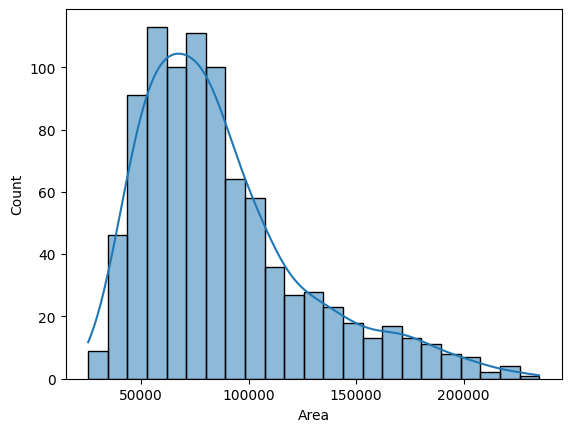

ValueError: could not convert string to float: 'Kecimen'

In [39]:
# Step 2: Pre-Processing the data
# Encoding
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalization:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Handling missing values: Check for missing values and handle them appropriately
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

# Noisy data suitable for the dataset: Outlier detection and removal if necessary


z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X_filtered = X[filtered_entries]
y_filtered = y[filtered_entries]

# You can choose which pre-processing techniques are suitable for your dataset
# For this example, we'll use standardization and normalization

# Step 3: Exploratory Data Analysis (EDA)

# Visualize the distribution of features using histograms, box plots, etc.
sns.histplot(df["Area"], kde=True)
plt.show()

# Explore correlations between features using a heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Step 4: Feature Engineering techniques (if needed)
# Extract relevant features, perform dimensionality reduction, engineer new features, etc.

# Step 5: Split the data into training, testing, and validation sets
from sklearn.model_selection import train_test_split

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the model
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Initialize the models
lr_model = LogisticRegression()
mlp_model = MLPClassifier()
knn_model = KNeighborsClassifier()
svm_model = SVC()
nb_model = GaussianNB()

# Fit the models
lr_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Step 7: Test the model
lr_score = lr_model.score(X_test, y_test)
mlp_score = mlp_model.score(X_test, y_test)
knn_score = knn_model.score(X_test, y_test)
svm_score = svm_model.score(X_test, y_test)
nb_score = nb_model.score(X_test, y_test)

# Step 8: Measure the performance of the trained model
print("Logistic Regression Score:", lr_score)
print("MLP Score:", mlp_score)
print("KNN Score:", knn_score)
print("SVM Score:", svm_score)
print("Naive Bayes Score:", nb_score)

# Step 9: Represent the training and testing results using ROC curves
# Import necessary libraries and plot ROC curves for each model
# Assess if any model is overfitting by comparing training and testing results

# Step 10: Ignore the class label and perform clustering task
from sklearn.cluster import KMeans

X_cluster = df.drop("Class", axis=1)

# Initialize the KMeans model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model
kmeans.fit(X_cluster)

# Measure the performance of the model
# Evaluate clustering performance using metrics like silhouette score, etc.

